In [2]:
import pandas as pd
import numpy as np
import ast
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
df = pd.read_csv("zomato_extracted_data_csv/zomato_extracted_data.csv",encoding = "ISO-8859-1",na_values=["NA",'-'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6147 entries, 0 to 6146
Data columns (total 23 columns):
restaurant_link           6147 non-null object
restaurant_ID             6147 non-null int64
restaurant_name           6147 non-null object
locality                  6147 non-null object
restaurant_category       6142 non-null object
zomato_gold               347 non-null object
discounts                 738 non-null object
photos_taken              6147 non-null int64
rating                    5328 non-null float64
votes                     5310 non-null float64
cuisines                  6147 non-null object
approx_cost_for_2         6147 non-null int64
opening_timings           6143 non-null object
address                   6041 non-null object
latitude                  5682 non-null float64
longitude                 5682 non-null float64
more_info                 6147 non-null object
featured_in               761 non-null object
known_for                 290 non-null object
mos

In [5]:
df.head(3)

restaurant_link  restaurant_ID  \
0  https://www.zomato.com/bangalore/abs-absolute-...          56618   
1  https://www.zomato.com/bangalore/uru-brewpark-...       19122613   
2  https://www.zomato.com/bangalore/the-big-barbe...       19203051   

             restaurant_name      locality restaurant_category  zomato_gold  \
0  AB's - Absolute Barbecues  Marathahalli       Casual Dining  zomato gold   
1               URU Brewpark      JP Nagar        Microbrewery          NaN   
2           The Big Barbeque  Marathahalli       Casual Dining          NaN   

  discounts  photos_taken  rating    votes  ...  \
0       NaN          4665     4.8  14700.0  ...   
1       NaN           776     4.3   1421.0  ...   
2       NaN           609     4.7   1744.0  ...   

                                             address   latitude  longitude  \
0  90/4, 3rd Floor, Outer Ring Road, Munnekollaly...  12.949798  77.699308   
1  Maratt Estate, 4th Phase, Near Maratt Pimento,...  12.905891  77.601274   
2  88, 2nd Floor, Outer Ring Road, Near More Supe...  12.948399  77.698877   

                                           more_info  \
0  ['Wheelchair Accessible', 'Full Bar Available'...   
1  ['Home Delivery', 'Full Bar Available', 'Night...   
2  ['Full Bar Available', 'Free Parking', 'Live M...   

                                         featured_in  \
0            ['Great Buffets', "Bengaluru's Finest"]   
1                           ['Sneak Peek Bengaluru']   
2  ['Sneak Peek Bengaluru', 'Corporate Favorites'...   

                   known_for  \
0  serving varieties of meat   
1                        NaN   
2                        NaN   

                                     most_liked_Food  \
0  ['5/5', 'Fish', 'Paan Ice Cream', 'Sea Food', ...   
1  ['4/5', 'Pizza', 'Nachos', 'Beer', 'Tiramisu',...   
2                                                NaN   

                                  most_liked_Service  \
0  ['4/5', 'Friendly Staff', 'Courteous Staff', '...   
1  ['4/5', 'Courteous Staff', 'Friendly Staff', '...   
2                                                NaN   

                              most_liked_Look & Feel  \
0  ['4/5', 'Live Grill', 'Lovely Ambience', 'Decor']   
1                                   ['4/5', 'Decor']   
2                                                NaN   

                                             reviews  
0  (['2019-12-03 12:40:39', 'positive', 'NA', 'Go...  
1  (['2020-01-08 18:17:08', 'positive', 'NA', 'Th...  
2  (['2020-01-17 08:23:30', 'NA', 'NA', "Food : 5...  

[3 rows x 23 columns]

In [6]:
df.shape

(6147, 23)

In [7]:
df = df.drop_duplicates("restaurant_ID",keep='first')

In [8]:
df.shape

(5637, 23)

In [9]:
def listToTuple(reviews):
    if isinstance(reviews,str):
        reviewList = ast.literal_eval(reviews)
        if len(reviewList)>0 and isinstance(reviewList,list):
            tup = (reviewList[0],reviewList[1:])
            return tuple(tup)

In [10]:
df["most_liked_Food"] = df["most_liked_Food"].apply(listToTuple)    
df["most_liked_Service"] = df["most_liked_Service"].apply(listToTuple)
df["most_liked_Look & Feel"] = df["most_liked_Look & Feel"].apply(listToTuple)

In [11]:
def formatTime(timing):
    if isinstance(timing,str):
        if timing is np.nan or timing == "[]":
            return "NA"
        timings = ast.literal_eval(timing)
        newtime = ['12:00' if timed == '12noon' else '00:00' if timed == "12midnight" else timed if ("24" in timed) else datetime.strptime(timed,'%I%p').strftime('%H:%M') if len(timed)<5 else datetime.strptime(timed,'%I:%M%p').strftime('%H:%M') for timed in timings]
        return newtime

In [12]:
df["opening_timings"] = df["opening_timings"].apply(formatTime)

In [13]:
df['cuisines'] = [x.split(",") if isinstance(x,str) else x for x in df["cuisines"]]

In [14]:
df.to_csv("zomato_clean_data_csv/zomato_clean_data"+".csv",index=False)

In [15]:
#reading the new clean data
df = pd.read_csv("zomato_clean_data_csv/zomato_clean_data.csv")

In [16]:
df.index = df["restaurant_ID"]
df.drop(["restaurant_ID"],axis=1,inplace=True)

In [17]:
df.shape

(5637, 22)

In [18]:
plt.style.use('ggplot')

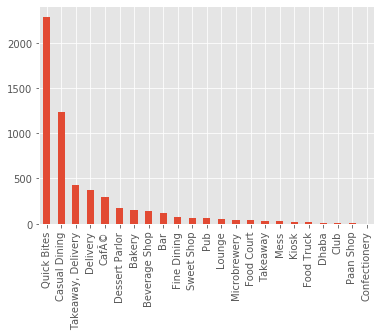

In [19]:
df["restaurant_category"].value_counts().plot.bar()

In [20]:
df['cuisines'] = df['cuisines'].apply(ast.literal_eval)


In [21]:
cuisines_series = df['cuisines'].apply(pd.Series).stack().reset_index(drop=True)


In [22]:
cuisines_series.value_counts(ascending = True)


 Parsi                  1
 Raw Meats              1
 Charcoal Chicken       1
 North Eastern          1
German                  1
                     ... 
 Fast Food            616
South Indian          730
 North Indian        1098
North Indian         1537
 Chinese             1694
Length: 175, dtype: int64

In [23]:
dffeatured = df.dropna(subset=['featured_in'])


In [24]:
dffeatured['featured_in'].apply(ast.literal_eval)


restaurant_ID
56618                     [Great Buffets, Bengaluru's Finest]
19122613                               [Sneak Peek Bengaluru]
19203051    [Sneak Peek Bengaluru, Corporate Favorites, Gr...
18853706                [Bengaluru's Finest, Outdoor Seating]
18706428    [Sunday Brunches, Live Sports Screenings, Beng...
                                  ...                        
53185                                     [Comfort In A Cup!]
58239                                [Live Sports Screenings]
18894358        [Food Hygiene Rated Restaurants in Bengaluru]
18538046                                           [Rooftops]
18601058                                      [Beer in a Bar]
Name: featured_in, Length: 739, dtype: object

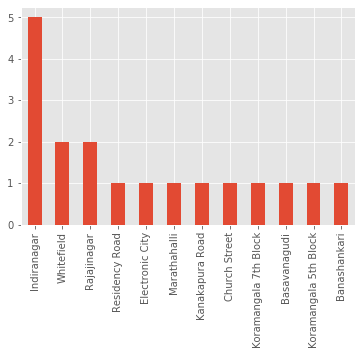

In [25]:
dffeatured["locality"][dffeatured['featured_in'].apply(lambda x: 'Newly Opened' in x)].value_counts().plot.bar()

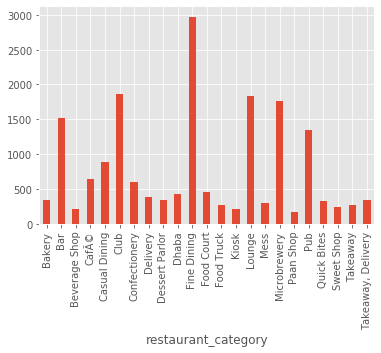

In [26]:
df.groupby("restaurant_category")['approx_cost_for_2'].mean().plot.bar()


In [27]:
df['rating'] = df['rating'].astype(float)


In [28]:
dfmeanratings = df.groupby("locality")['rating'].mean()
dfmeanratings.sort_values(ascending=False)

locality
Sankey Road              4.225000
Lavelle Road             4.143333
Church Street            4.095833
Race Course Road         4.084211
Koramangala 5th Block    4.061290
                           ...   
CV Raman Nagar           3.526087
Ejipura                  3.520000
Uttarahalli              3.515385
Bommanahalli             3.500000
City Market              3.476923
Name: rating, Length: 96, dtype: float64

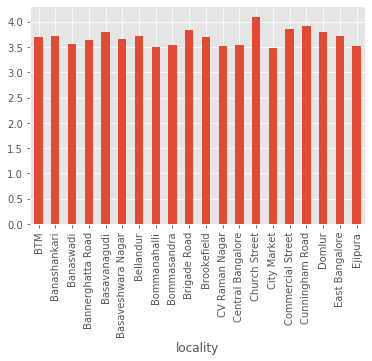

In [29]:
#Plotting avg rating of first 20 localities
dfmeanratingsTop20 = dfmeanratings[0:20]
dfmeanratingsTop20.plot.bar()

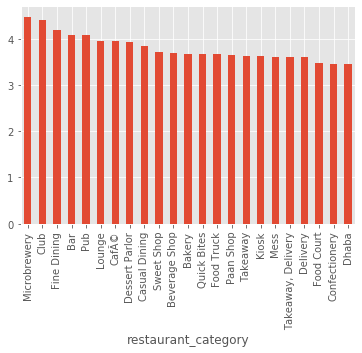

In [30]:
dfcatratings = df.groupby("restaurant_category")['rating'].mean()
dfcatratings.sort_values(ascending=False).plot.bar()

In [31]:
def combineFeatureText(series,exist=False):
    text = []
    for i in series.iteritems():
        for j in i:
            if type(j) is tuple:
                for k in j[1]:
                    if(exist):
                        if k not in text:
                            text.append(k)
                    else:
                        text.append(k)
                
    return text

In [32]:
topCategories = ['Club','Microbrewery']
dfLikedInTopCat = df[df['restaurant_category'].isin(topCategories)]

dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Food'])
dfLikedInTopCat['most_liked_Food'] = dfLikedInTopCat['most_liked_Food'].apply(ast.literal_eval)
mostLikedFoodText = dfLikedInTopCat.groupby(['restaurant_category'])['most_liked_Food'].agg(combineFeatureText,True)

dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Service'])
dfLikedInTopCat['most_liked_Service'] = dfLikedInTopCat['most_liked_Service'].apply(ast.literal_eval)
mostLikedServiceText = dfLikedInTopCat.groupby('restaurant_category')['most_liked_Service'].agg(combineFeatureText,True)

dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Look & Feel'])
dfLikedInTopCat['most_liked_Look & Feel']= dfLikedInTopCat['most_liked_Look & Feel'].apply(ast.literal_eval)
mostLikedLooknFeelText = dfLikedInTopCat.groupby('restaurant_category')['most_liked_Look & Feel'].agg(combineFeatureText,True)

mostLikedCombined = mostLikedFoodText + mostLikedServiceText + mostLikedLooknFeelText

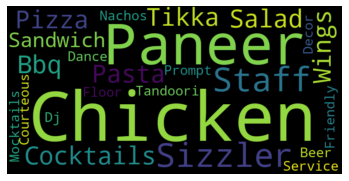

In [33]:
liked_text = ' '.join(review for review in mostLikedCombined["Club"])

wordcloud = WordCloud(width=800, height=400).generate(liked_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


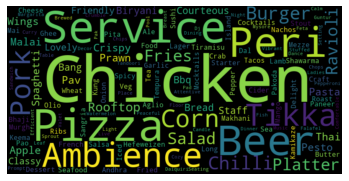

In [34]:
liked_text = ' '.join(review for review in mostLikedCombined["Microbrewery"])

wordcloud = WordCloud(width=800, height=400).generate(liked_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
topCategories = ['Quick bites','Casual Dining',]
dfLikedInTopCat = df[df['restaurant_category'].isin(topCategories)]

dfLikedInTopCat = dfLikedInTopCat.dropna(subset=['most_liked_Food'])
dfLikedInTopCat['most_liked_Food'] = dfLikedInTopCat['most_liked_Food'].apply(ast.literal_eval)
mostLikedFoodText = dfLikedInTopCat.groupby(['restaurant_category'])['most_liked_Food'].agg(combineFeatureText,False)

cuisines_series = mostLikedFoodText.apply(pd.Series).stack().reset_index(drop=True)
cuisines_series.value_counts(ascending = False)

Biryani                 170
Pasta                   129
Fish                    122
Mocktails               104
Salad                   104
                       ... 
Chocolate Cheesecake      1
Bangla Kodi               1
Chole                     1
Pork Belly                1
Mutton Grill              1
Length: 992, dtype: int64

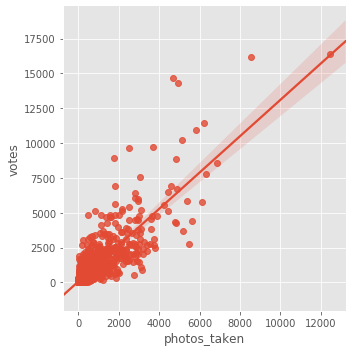

In [36]:
sns.lmplot('photos_taken','votes',data=df)

In [37]:
dfZomato = df.groupby(['locality','restaurant_category','zomato_gold'])['rating'].mean()
dfZomato

locality       restaurant_category  zomato_gold
BTM            Bar                  zomato gold    3.600000
               Casual Dining        zomato gold    4.150000
               Dessert Parlor       zomato gold    4.400000
Banashankari   Casual Dining        zomato gold    3.700000
               Lounge               zomato gold    3.900000
                                                     ...   
Whitefield     Pub                  zomato gold    4.200000
Wilson Garden  Casual Dining        zomato gold    3.900000
Yelahanka      Casual Dining        zomato gold    4.033333
Yeshwantpur    Bar                  zomato gold    3.700000
               Casual Dining        zomato gold    3.833333
Name: rating, Length: 155, dtype: float64

In [38]:
dfNoZomato = df.groupby(['locality','restaurant_category'])['rating'].mean()
dfNoZomato

locality     restaurant_category
BTM          Bakery                 3.660000
             Bar                    3.600000
             Beverage Shop          3.690909
             CafÃ©                  3.769231
             Casual Dining          3.805882
                                      ...   
Yeshwantpur  Pub                    4.100000
             Quick Bites            3.621429
             Sweet Shop             3.450000
             Takeaway                    NaN
             Takeaway, Delivery     3.400000
Name: rating, Length: 820, dtype: float64

locality     restaurant_category
BTM          Bakery                 3.660000
             Bar                    3.600000
             Beverage Shop          3.690909
             CafÃ©                  3.769231
             Casual Dining          3.805882
                                      ...   
Yeshwantpur  Pub                    4.100000
             Quick Bites            3.621429
             Sweet Shop             3.450000
             Takeaway                    NaN
             Takeaway, Delivery     3.400000
Name: rating, Length: 820, dtype: float64

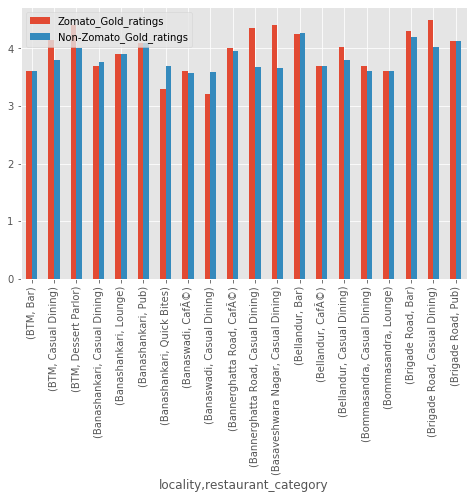

In [39]:
mergeddf = pd.merge(dfZomato,dfNoZomato,how ='left',on=['locality','restaurant_category'])
slicedMergeddf = mergeddf[0:20] #slice dataframe
ax = slicedMergeddf.plot.bar(figsize=(8,5))
ax.legend(["Zomato_Gold_ratings", "Non-Zomato_Gold_ratings"]);
dfNoZomato

In [40]:
df['reviews_new'] = df['reviews'].apply(ast.literal_eval)

In [41]:
review_series = df['reviews_new'].apply(pd.Series).stack().reset_index(drop=True)

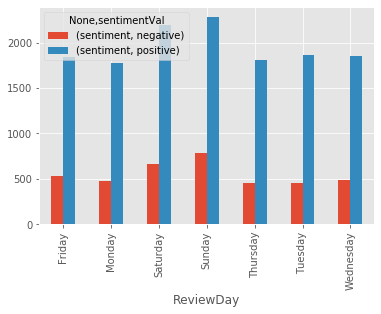

In [42]:
p = [i[0:3] for i in review_series]

cols = ["ReviewDay","Positive sentiment","Negative sentiment"]
for i,obj in enumerate(p):
    obj[0] = datetime.strptime(obj[0], '%Y-%m-%d %H:%M:%S').strftime('%A')
    
newDF = pd.DataFrame(p,columns=cols)

s = newDF.set_index("ReviewDay").unstack().reset_index()
df3 = s.set_axis(['sentiment', 'ReviewDay','sentimentVal'], axis=1, inplace=False)

df3 = df3[df3.sentimentVal != 'NA']
df4 = df3.groupby(['ReviewDay','sentimentVal']).count()
df4.unstack().plot(kind='bar')

Index(['restaurant_link', 'restaurant_name', 'locality', 'restaurant_category',
       'zomato_gold', 'discounts', 'photos_taken', 'rating', 'votes',
       'cuisines', 'approx_cost_for_2', 'opening_timings', 'address',
       'latitude', 'longitude', 'more_info', 'featured_in', 'known_for',
       'most_liked_Food', 'most_liked_Service', 'most_liked_Look & Feel',
       'reviews', 'reviews_new'],
      dtype='object')

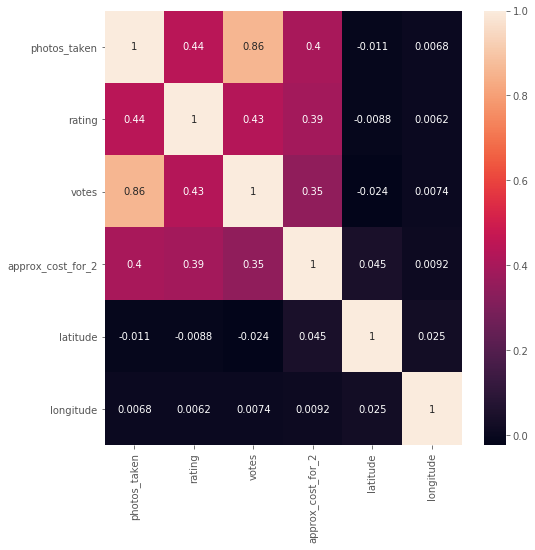

In [44]:
#getting correlations in different variables 
corr = df.corr(method='pearson')
plt.figure(figsize=(8,8))
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
df.columns

In [117]:
#Crearting a new copy of dataframe
dfm = df.copy()

In [118]:
#encoding categorical variables
from sklearn import preprocessing

class Categorical_encoding:
    def __init__(self, df, categorical_features):
        self.df = df
        self.output_df = self.df.copy(deep=True)
        self.cat_features = categorical_features
        
        for c in self.cat_features:
            self.df.loc[:,c] = self.df.loc[:,c].astype(str).fillna(-1)
    
    def label_encoding(self):
        for c in self.cat_features:
            lbl = preprocessing.LabelEncoder()
            lbl.fit(self.df[c].values)
            self.output_df.loc[:,c] = lbl.transform(self.df[c].values)
        
        return self.output_df

In [119]:
# Label encoding Locality and restaurant category
dfm = dfm.apply(lambda x: x.mask(x.map(x.value_counts()) < 20, 'other') if x.name == 'restaurant_category' else x)
dfm = dfm.apply(lambda x: x.mask(x.map(x.value_counts()) < 20, 'other') if x.name == 'locality' else x)


cols = ['locality','restaurant_category']        
o_df = Categorical_encoding(dfm,cols)  
dfm = o_df.label_encoding()

In [120]:
dfm["featured_in_count"] = dfm["featured_in"].apply(lambda x: len(ast.literal_eval(x)) if x is not np.nan else x)
dfm["featured_in_count"]

restaurant_ID
56618       2.0
19122613    1.0
19203051    4.0
18853706    2.0
19109185    NaN
           ... 
18700915    NaN
18783421    NaN
18787840    NaN
18783445    NaN
18762853    NaN
Name: featured_in_count, Length: 5637, dtype: float64

In [111]:

# meanrating = dfm['rating'].mean()
# dfm['rating'] = dfm['rating'].fillna(meanrating)
# meanrating

In [121]:
# converting to numerics

dfm["zomato_gold"] = dfm["zomato_gold"].apply(lambda x: 1 if x == 'zomato gold' else 0)
dfm["discounts"] = dfm["discounts"].apply(lambda x: 1 if x is not np.nan else 0)

In [122]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

def LabelBinarizerEncoding(categoricalList,colSubset = []):
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(categoricalList),columns = mlb.classes_,index = categoricalList.index)
    return res

In [123]:
famousCuisines = ['Chinese','North Indian','South Indian','Fast Food']
famousMostLikedFood = ['Cocktails','Mocktails','Pizza','Pasta']
famousService = ['Friendly Staff','Courteous Staff']
famousLookFeel = ['Decor']

dfcuisinesbin = LabelBinarizerEncoding(dfm['cuisines'])
dfcuisinesbin_ = dfcuisinesbin[famousCuisines]

dfm["most_liked_Food"] = dfm["most_liked_Food"].apply(lambda x: ast.literal_eval(x)[1] if x is not np.nan else [])
dfostLikedFoodbin = LabelBinarizerEncoding(dfm['most_liked_Food'])
dfostLikedFoodbin_ = dfostLikedFoodbin[famousMostLikedFood]

dfm["most_liked_Service"] = dfm["most_liked_Service"].apply(lambda x: ast.literal_eval(x)[1] if x is not np.nan else [])
dfostLikedServicebin = LabelBinarizerEncoding(dfm['most_liked_Service'])
dfostLikedServicebin_ = dfostLikedServicebin[famousService]

dfm["most_liked_Look & Feel"] = dfm["most_liked_Look & Feel"].apply(lambda x: ast.literal_eval(x)[1] if x is not np.nan else [])
dfostLikedLookFeelbin = LabelBinarizerEncoding(dfm['most_liked_Look & Feel'])
dfostLikedLookFeelbin_ = dfostLikedLookFeelbin[famousLookFeel]


In [124]:
def addbinarisedCols(binariseddf,colsFilterList):
    for i in range(len(colsFilterList)):
        dfm[colsFilterList[i]] = binariseddf[colsFilterList[i]]

addbinarisedCols(dfcuisinesbin_,famousCuisines)
addbinarisedCols(dfostLikedFoodbin_,famousMostLikedFood)
addbinarisedCols(dfostLikedServicebin_,famousService)
addbinarisedCols(dfostLikedLookFeelbin_,famousLookFeel)

dfm.head(3)

restaurant_link  \
restaurant_ID                                                      
56618          https://www.zomato.com/bangalore/abs-absolute-...   
19122613       https://www.zomato.com/bangalore/uru-brewpark-...   
19203051       https://www.zomato.com/bangalore/the-big-barbe...   

                         restaurant_name  locality  restaurant_category  \
restaurant_ID                                                             
56618          AB's - Absolute Barbecues        46                    4   
19122613                    URU Brewpark        24                   13   
19203051                The Big Barbeque        46                    4   

               zomato_gold  discounts  photos_taken  rating    votes  \
restaurant_ID                                                          
56618                    1          0          4665     4.8  14700.0   
19122613                 0          0           776     4.3   1421.0   
19203051                 0          0           609     4.7   1744.0   

                                                        cuisines  ...  \
restaurant_ID                                                     ...   
56618            [European,  Mediterranean,  North Indian,  BBQ]  ...   
19122613       [Continental,  North Indian,  Pizza,  Asian,  ...  ...   
19203051       [North Indian,  Continental,  Chinese,  Pizza,...  ...   

               North Indian South Indian Fast Food  Cocktails  Mocktails  \
restaurant_ID                                                              
56618                     0            0         0          0          0   
19122613                  0            0         0          0          0   
19203051                  1            0         0          0          0   

              Pizza Pasta Friendly Staff Courteous Staff Decor  
restaurant_ID                                                   
56618             0     0              1               1     1  
19122613          1     1              1               1     1  
19203051          0     0              0               0     0  

[3 rows x 35 columns]

In [153]:
# Create training and test sets

# meanVotes = dfm['votes'].mean()
# dfm['votes'] = dfm['votes'].fillna(meanVotes)

dfm['featured_in_count'] = dfm['featured_in_count'].fillna(0)

dfm = dfm[dfm['rating'].notnull()]
dfm = dfm[dfm['votes'].notnull()]


Index(['restaurant_link', 'restaurant_name', 'locality', 'restaurant_category',
       'zomato_gold', 'discounts', 'photos_taken', 'rating', 'votes',
       'cuisines', 'approx_cost_for_2', 'opening_timings', 'address',
       'latitude', 'longitude', 'more_info', 'featured_in', 'known_for',
       'most_liked_Food', 'most_liked_Service', 'most_liked_Look & Feel',
       'reviews', 'reviews_new'],
      dtype='object')

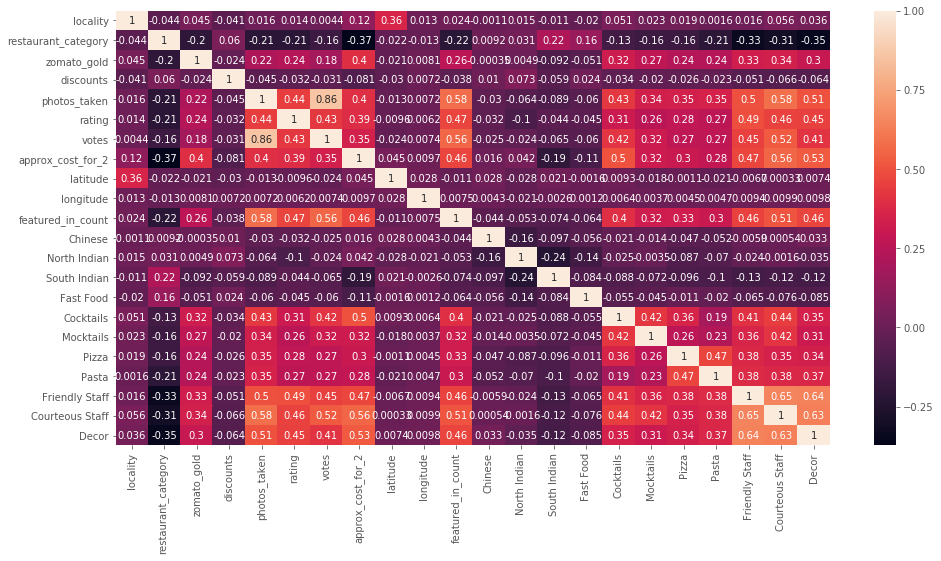

In [126]:
corr = dfm.corr(method='pearson')
plt.figure(figsize=(16,8))
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
df.columns

In [154]:
# Features

# X = dfm[['photos_taken','votes','approx_cost_for_2','featured_in_count','zomato_gold','discounts',
#         'Chinese','North Indian','South Indian','Fast Food','Biryani','Pasta','Fish','Mocktails','Salad']]

# y = dfm['rating']

X = dfm[['locality','restaurant_category','photos_taken','votes','approx_cost_for_2','featured_in_count','zomato_gold','discounts',
        'Fast Food','Cocktails','Mocktails','Pizza','Pasta',
        'Friendly Staff', 'Courteous Staff','Decor']]

y = dfm['rating']

locality  restaurant_category  photos_taken    votes  \
restaurant_ID                                                         
56618                46                    4          4665  14700.0   
19122613             24                   13           776   1421.0   
19203051             46                    4           609   1744.0   
18853706             24                   13          1869   3209.0   
19109185             16                   14            39    173.0   
...                 ...                  ...           ...      ...   
19097342              0                   15             2     12.0   
19138752             24                   15             0     13.0   
18693381             48                    4             1      5.0   
18783421              0                   15             7     10.0   
18762853             51                    9             6      9.0   

               approx_cost_for_2  featured_in_count  zomato_gold  discounts  \
restaurant_ID                                                                 
56618                       1600                2.0            1          0   
19122613                    1700                1.0            0          0   
19203051                    1500                4.0            0          0   
18853706                    1850                2.0            0          0   
19109185                     800                0.0            0          0   
...                          ...                ...          ...        ...   
19097342                     250                0.0            0          0   
19138752                     550                0.0            0          0   
18693381                     800                0.0            0          0   
18783421                     150                0.0            0          0   
18762853                     200                0.0            0          0   

               Fast Food  Cocktails  Mocktails  Pizza  Pasta  Friendly Staff  \
restaurant_ID                                                                  
56618                  0          0          0      0      0               1   
19122613               0          0          0      1      1               1   
19203051               0          0          0      0      0               0   
18853706               0          1          1      1      1               1   
19109185               0          0          0      0      0               0   
...                  ...        ...        ...    ...    ...             ...   
19097342               0          0          0      0      0               0   
19138752               0          0          0      0      0               0   
18693381               0          0          0      0      0               0   
18783421               0          0          0      0      0               0   
18762853               0          0          0      0      0               0   

               Courteous Staff  Decor  
restaurant_ID                          
56618                        1      1  
19122613                     1      1  
19203051                     0      0  
18853706                     1      1  
19109185                     0      0  
...                        ...    ...  
19097342                     0      0  
19138752                     0      0  
18693381                     0      0  
18783421                     0      0  
18762853                     0      0  

[4895 rows x 16 columns]

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# # Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# # Predict on the test data: y_pred
y_pred_test = reg_all.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred_test))

y_pred_train = reg_all.predict(X_train)

from sklearn.metrics import r2_score
print(r2_score(y_train,y_pred_train))

# Compute and print R^2 and RMSE
# print("R^2: {}".format(reg_all.score(X_train, y_train)))

# rmse = np.sqrt(mean_squared_error(y_train, y_pred))
# print("Root Mean Squared Error: {}".format(rmse))


0.36442988306249646
0.34252137052618614


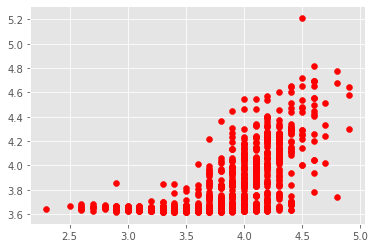

In [169]:
plt.scatter(y_test, y_pred_test, color = 'red')

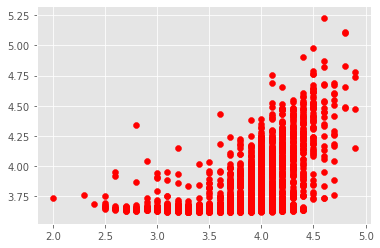

In [170]:
plt.scatter(y_train, y_pred_train, color = 'red')

In [172]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

RForest = RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)

RForest.fit(X_train,y_train)

y_pred_test = RForest.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred_test))


y_pred_train = RForest.predict(X_train)

from sklearn.metrics import r2_score
print(r2_score(y_train,y_pred_train))


0.5200137791104131
0.9372944963483778


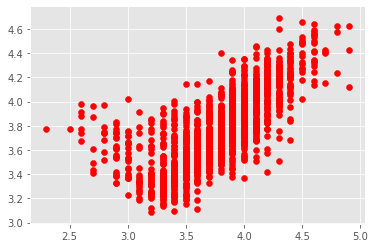

In [173]:
plt.scatter(y_test, y_predict_test, color = 'red')

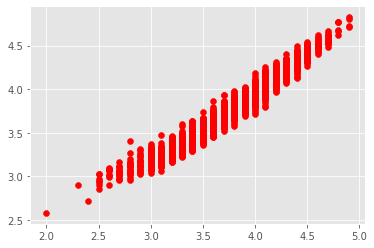

In [174]:
plt.scatter(y_train, y_predict_train, color = 'red')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)

y_pred = DTree.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)